# CES


## Statistiques régression linéaire avec Python

Auteurs : Joseph Salmon, Alexandre Gramfort

Ce notebook contient des éléments d'introduction au langage Python avec Numpy qui est un outil de base pour le machine learning en Python. Nous allons illustrer tous les concepts sur des images.

Ressources externes: introductions générales (Python, Scipy, Numpy, Matplotlib, Pandas etc.)

* [http://scipy-lectures.github.io](http://scipy-lectures.github.io)

* [http://perso.telecom-paristech.fr/~gramfort/cours_python/1-Intro-Python.html](http://perso.telecom-paristech.fr/~gramfort/cours_python/1-Intro-Python.html)

* [http://perso.telecom-paristech.fr/~gramfort/cours_python/2-Numpy.html](http://perso.telecom-paristech.fr/~gramfort/cours_python/2-Numpy.html)

* [http://perso.telecom-paristech.fr/~gramfort/cours_python/3-Scipy.html](http://perso.telecom-paristech.fr/~gramfort/cours_python/3-Scipy.html)

* [http://jrjohansson.github.io/](http://jrjohansson.github.io/)

* [http://www.loria.fr/~rougier/teaching/matplotlib/matplotlib.html](http://www.loria.fr/~rougier/teaching/matplotlib/matplotlib.html) : introduction à Matplotlib

* [https://www.youtube.com/watch?v=TSsSWuhBpmY](https://www.youtube.com/watch?v=TSsSWuhBpmY) : tutoriel en anglais sur Pandas

Ressources externes diverses:

* [http://freakonometrics.hypotheses.org/category/statistics](http://freakonometrics.hypotheses.org/category/statistics): Blog sur la statistique / science des données

* [http://perso.univ-rennes1.fr/bernard.delyon/regression.pdf](http://perso.univ-rennes1.fr/bernard.delyon/regression.pdf): cours théorique sur la régression lineaire

* [http://bokeh.pydata.org/en/latest/docs/gallery/color_scatter.html](http://bokeh.pydata.org/en/latest/docs/gallery/color_scatter.html): affichage graphique interactif

## Imports et intialisation

In [2]:
import numpy as np
import pandas as pd  # charge un package pour le traitement des données
import matplotlib.pyplot as plt

## Chargement manipulation des données:

On utilisera IPython Notebook pour faire ce TP.

REM: pour les salles machines de Telecom Paristech, charger la version Anconda disponible dans le menu application/developpement. 

Le mot "régression" a été introduit par Sir Francis Galton (cousin de C. Darwin) alors qu'il étudiait la taille des individus au sein d'une descendance. Il tentait de comprendre pourquoi les grands individus d'une population semblait avoir des enfants d'une taille plus petite, plus proche de la taille moyenne de la population; d’où l'introduction du terme "régression". Dans la suite on va s’intéresser aux données historiques récoltées par Galton.


**Questions**: que signifie '\t' dans la commde suivante?

In [3]:
url = 'http://www.math.uah.edu/stat/data/Galton.txt'
data = pd.read_csv(url, sep='\t')
data.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


**Questions**: Que fait la ligne de commande suivante? 

In [4]:
data['MeanParents'] = 0.5 * (data['Father'] + 1.08 * data['Mother'])

Pour information la taille du parent "moyen" selon Galton vaut: $\frac12\left(\mathrm{taille}(\mathrm{pere}) + 1.08 \times \mathrm{taille}(\mathrm{mere})\right)$

**Questions**: Comparer les deux commandes qui suivent et notamment les tailles:

In [5]:
X0 = data[['MeanParents']]
X0prime = data['MeanParents']


## Régression en dimension 1:
On note $x_i$ la taille du parent moyen pour la famille $i$ et $y_i$ la taille de l'enfant. On écrit $y_i = \theta_1 x_i + \theta_0 + \varepsilon_i$ et on modlise les variables $\varepsilon_i$ comme centrées, indépendantes de même variance $\sigma^2$ inconnue.

**Questions**: Tracer le nuage de points $(x_i, y_i)$ pour $1\leq i\leq n$, où $n$ est le nombre d'observations figurant dans les données.

<IPython.core.display.Javascript object>


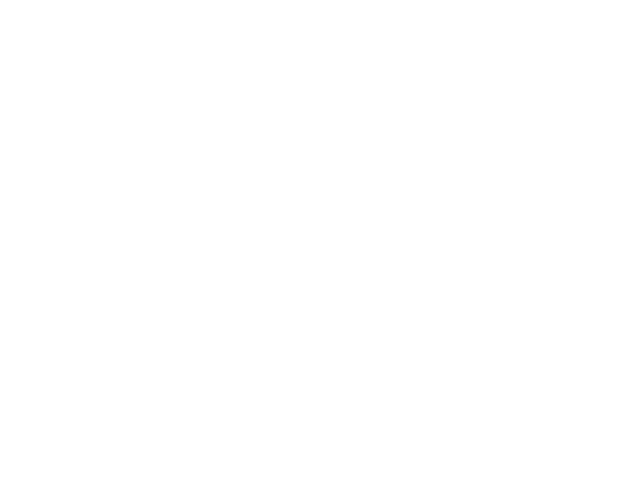

In [7]:
%matplotlib notebook
y = data['Height']
fig=plt.figure()


**Question**: Estimer $\theta_0$, $\theta_1$, par $\hat{\theta}_0$, $\hat{\theta}_1$ en utilisant la fonction **LinearRegression** de **sklearn**.

In [9]:
from sklearn import linear_model
skl_linmod = linear_model.LinearRegression()


**Question**: Calculer et visualiser les valeurs prédites $\hat y_i = \hat\theta_1 x_i
+\hat\theta_0$ et $y_i$ sur un même graphique.

<IPython.core.display.Javascript object>


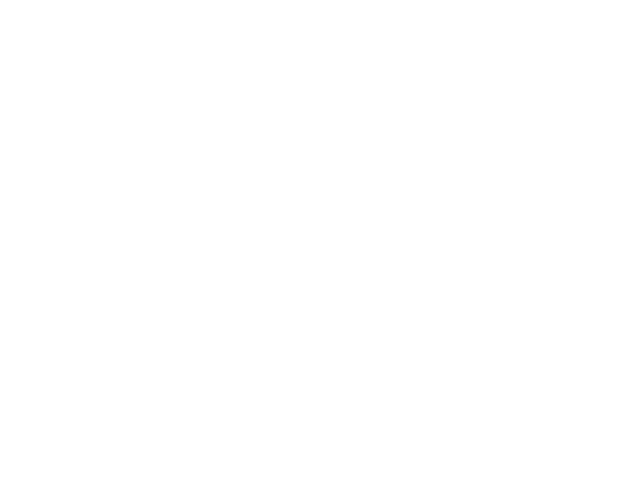

In [11]:
fig=plt.figure()


**Question**: Visualiser l'histogramme des résidus $r_i = y_i -\hat y_i$. L'hypothèse de normalité est-elle crédible? 

Bonus: Afficher aussi un estimateur de la densite de type "estimateur à noyau" avec un noyau gaussien (cf. [https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/) pour plus d'informations)

<IPython.core.display.Javascript object>


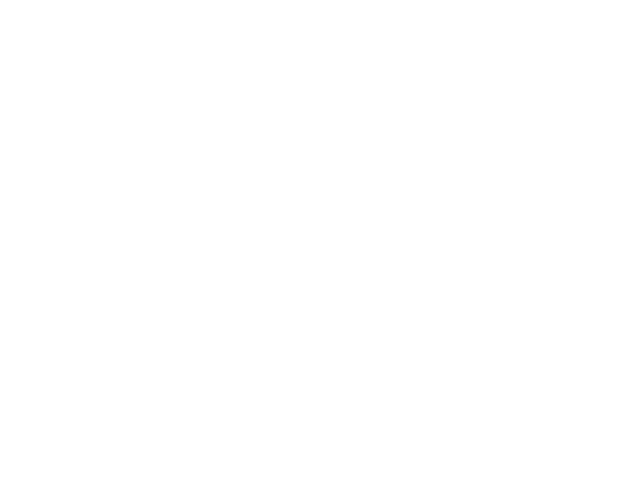

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [12]:
plt.figure()
residual = skl_linmod.predict(X0) - y
plt.hist(residual, bins=30, normed=True, align='mid')
plt.title('Histogramme')
plt.xlabel(u'Résidus') # noter la l'utilisaiton du u 'Résidus'
plt.ylabel('Proportion')

In [11]:
from sklearn.neighbors import KernelDensity
def kde_sklearn(x, x_grid, bandwidth=0.2):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

<IPython.core.display.Javascript object>


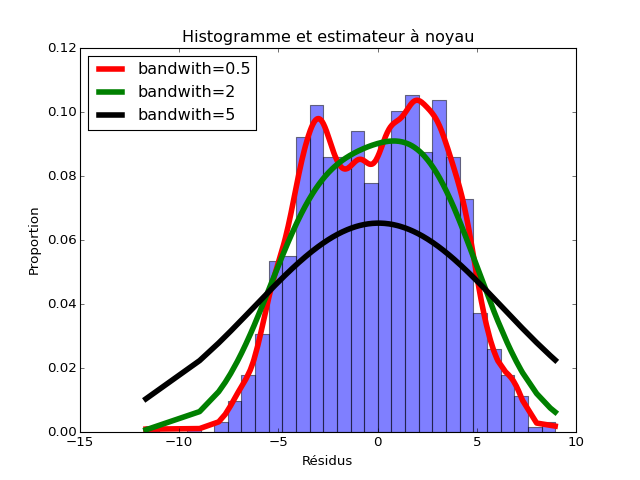

In [12]:
x_test= np.sort(residual)
fig=plt.figure()
plt.hist(residual, bins=30, normed=True, align='mid',alpha=0.5)
plt.plot(x_test, kde_sklearn(x_test, x_test, bandwidth=0.5),
         '-r',linewidth=5,label='bandwith=0.5')
plt.plot(x_test, kde_sklearn(x_test, x_test, bandwidth=2),
         '-g',linewidth=5,label='bandwith=2')
plt.plot(x_test, kde_sklearn(x_test, x_test, bandwidth=5),
         '-k',linewidth=5,label='bandwith=5')
plt.legend(loc=2)
plt.title(u'Histogramme et estimateur à noyau')
plt.xlabel(u'Résidus') # noter la l'utilisaiton du u 'Résidus'
plt.ylabel('Proportion')

## Régression en dimension 2:

On travaille ici avec la même base de données, mais cette fois on considère un modèle de régression avec les deux variables explicatives “**Father**” et “**Mother**”.

On rappelle les notations suivantes:

* $\hat{\theta} \in argmin_{\theta \in \mathbb{R}^p} \|y -X\theta\|^2/2$ est l'estimateur par moindres carrés de $\theta$  (pour rappel $\hat{\theta} = (X^\top X)^{-1}X^\top y$ quand la matrice $X^\top X$ est inversible).

* $\hat y = X \hat\theta$, la prédiction sur les valeurs observées

* Le vecteur $r=y-\hat y$ est appelé vecteur des résidus.
$1_n=(1,\dots,1)^\top $ est le vecteur rempli de un, et de taille $n\times 1$


**Question**: Calculer $\hat\theta$, $\hat y$ pour ce modèle avec **sklearn**

In [13]:
X1 = data[['Father', 'Mother']]
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(X1, y)

results = skl_linmod.coef_
print results
print skl_linmod.intercept_

[ 0.37989697  0.28321451]
22.3097054896


**Question**: comment fonctionne la fonction meshgrid ci-dessous? Afficher les points et leur prédictions sur un même graphique 3D.

<IPython.core.display.Javascript object>


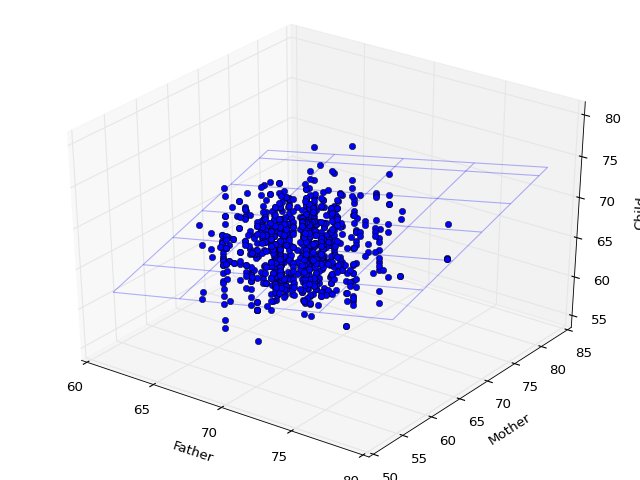

In [15]:
# Meshgrid creation:
XX = np.arange(np.min(X1['Father']) - 2, np.max(X1['Father']) + 2, 0.5)
YY = np.arange(np.min(X1['Mother']) - 2, np.max(X1['Mother']) + 2, 0.5)
YY = np.arange(np.min(y) - 2, np.max(y) + 2, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results[0] * xx + results[1] * yy + skl_linmod.intercept_

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1['Father'], X1['Mother'], y, 'o')
ax.set_zlim(np.min(y) - 2, np.max(y) + 2)
ax.set_xlabel('Father')
ax.set_ylabel('Mother')
ax.set_zlabel('Child')
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10, alpha=0.3)

**Question**: Calculer le carré de la norme du vecteur des résidus: $ \|r\|^2$. Visualiser l'histogramme des résidus, et aussi un estimateur à noyau de leur densité.

**Question**: Comparer l'influence des deux variables. Laquelle semble la plus explicative? Tester avant et après centrage et réduction des données. Utiliser pour cela **StandardScaler** de **preprocessing**. 

## Régression en dimension 2: dataset auto-mpg 

On travaille maintenant sur le fichier '**auto-mpg.data**' et on cherche à régresser la consommation des voitures sur leurs caractéristiques: nombre de cylindres, cylindrés (*engine displacement* en anglais), puissance, poids, accélération, année, pays d'origine et le nom de la voiture.

On utilise un modèle linéaire,
où $y$ est le vecteur contenant les consommations des voitures (plus précisément la distance parcourue en *miles par gallon*, ou *mpg*);
les colonnes de $X$ sont les variables restantes. 

**Question**: Importer avec Pandas la base de données disponible ici https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data. On peut ajouter (manuellement) le noms des colonnes en consultant l’adresse : https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names avec l’attribut 'names' de import_csv. On pourra si besoin considérer l'option sep=r"\s\+".


In [20]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
u_cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'model year', 'origin', 'car name']
data = pd.read_csv(url, sep=r"\s+", names=u_cols)
print data.shape

(398, 9)


**Question**: Quelle est le marqueur utilisé pour les données manquantes dans le fichier csv utilisé ? Changer cet élément en un NaN, avec l’option na_values de **read_csv**. 

In [21]:
data.isnull().any()
np.where(data['horsepower'].isnull())[0]
# opposite
# np.where(data['horsepower'].notnull())[0]

array([], dtype=int32)

**Question**: Tester s'il y a des NaN dans le dataframe. Quelles sont les lignes qui en ont? pour quelle(s) variable(s)? Enlever ces lignes. 

In [14]:
data = data.dropna(axis=0, how='any')
print data.shape

(397, 9)


**Question**: Calculer $\hat\theta$ et $\hat y$ sur une sous partie de la base: garder les $9$ premières lignes et exclure la variable 
'**car name**' de l'étude. Que constatez-vous?

In [59]:
y = data['mpg']
X = data.drop(['car name', 'mpg'], axis=1)
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)

skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(X[:9], y[:9])
print skl_linmod.coef_
print skl_linmod.intercept_
skl_linmod.predict(X[:9])

print skl_linmod.singular_
print skl_linmod.rank_
# print X[:9]


[ 0.          0.05408848 -0.0945306  -0.00424074 -0.19936701  0.          0.        ]
30.7716953656
[ 1314.67290882    34.45036254    10.61389834     1.92770452    -0.             0.
     0.        ]
4


**Question**: Calculer l'estimateur des moindres carrés $\hat\theta$ et le vecteur de prediction $\hat y$ cette fois sur l'intégralité des données. Calculer le carré de la norme du vecteur des résidus $ \|r\|^2$,
 puis $\|r\|^2/n$. Vérifier numériquement que:
 
  $$\| y - \bar{y}_n 1_n\|^2=\| y - \hat{y}\|^2 +\| \hat{y} - \bar{y}_n 1_n\|^2$$
  
 avec $\bar{y}_n$ répresentant la moyenne des $y_i$.
  
  

**Question**: Supposons que l'on vous fournisse les caractéristiques suivantes d'un nouveau véhicule :

cylinders=6; displacement=225; horsepower =100; weight=3234; acceleration=15.4; year=76; origin=1    

Prédire alors sa consommation.

**Question**: Utiliser la transformation **PolynomialFeatures** de **sklearn** sur les données, pour ajuster un modèle d'ordre 2. On pourra tester cela avec ou sans les termes d'interactions avec l'option **interaction_only=True/False**

**Question Bonus** : Proposer une manière de gérer les variables qualitatives, potentiellement avec **sklearn.preprocessing.OneHotEncoder**.